In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("winequality-red.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

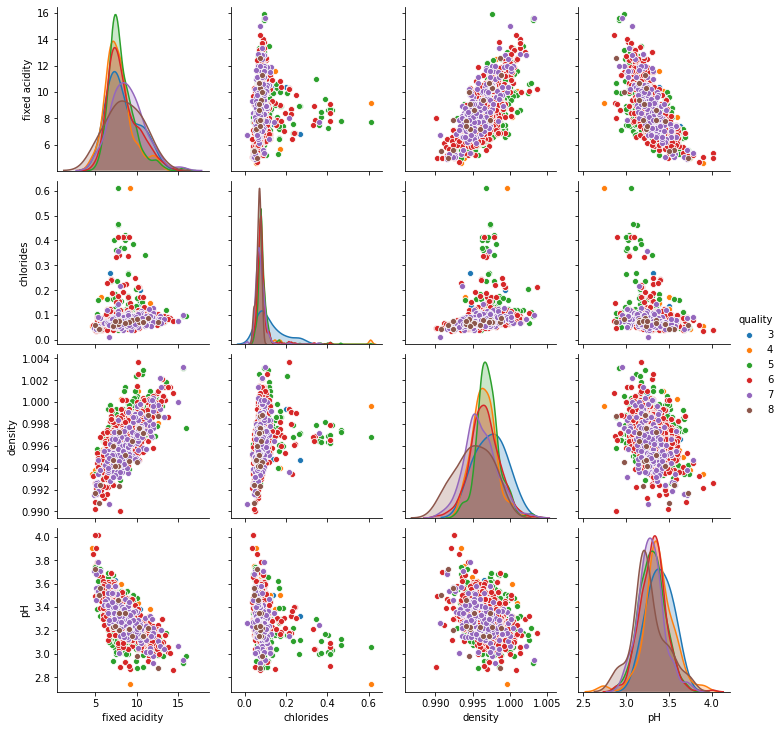

In [20]:
var = ['fixed acidity', 'chlorides', 'density', 'pH']
sns.pairplot(data=df, vars = var, hue="quality")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce1bfd5510>,
      dtype=object)

<Figure size 1080x720 with 0 Axes>

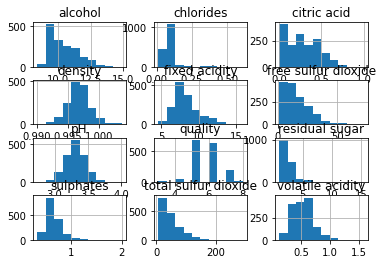

In [36]:
plt.figure(figsize=(15,10))
df.hist()

In [38]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [43]:
x = df.drop(['quality'], axis=1)
y=df['quality']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [45]:
rfc = RandomForestClassifier()
accuracy = cross_val_score(rfc, x_train,y_train,cv=10, scoring="accuracy")

In [46]:
accuracy

array([0.6015625 , 0.6484375 , 0.671875  , 0.640625  , 0.6640625 ,
       0.71875   , 0.75      , 0.6484375 , 0.640625  , 0.73228346])

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
acc = cross_val_score(xgb, x_train,y_train,cv=10, scoring="accuracy")
acc

array([0.578125  , 0.5703125 , 0.640625  , 0.6015625 , 0.6328125 ,
       0.59375   , 0.65625   , 0.6015625 , 0.625     , 0.64566929])

In [48]:
from sklearn.tree import ExtraTreeClassifier
model = ExtraTreeClassifier()
model.fit(x,y)

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

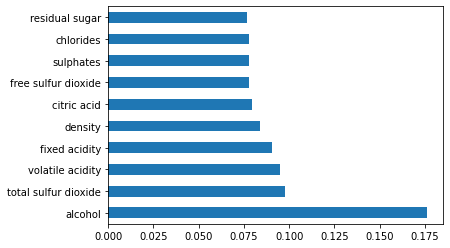

In [49]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(10).plot(kind="barh")
plt.show()

## So as we see all features are important except alcohol which is super important

In [50]:
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.81      0.78       135
           6       0.73      0.75      0.74       142
           7       0.57      0.59      0.58        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.69      0.72      0.71       320

0.721875


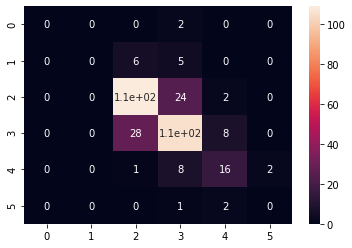

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [53]:
filename = 'wine-quality-prediction-rfc-model.pkl'
pickle.dump(rfc, open(filename, 'wb'))

<IPython.core.display.Javascript object>

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
